In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

<Figure size 1200x1000 with 0 Axes>

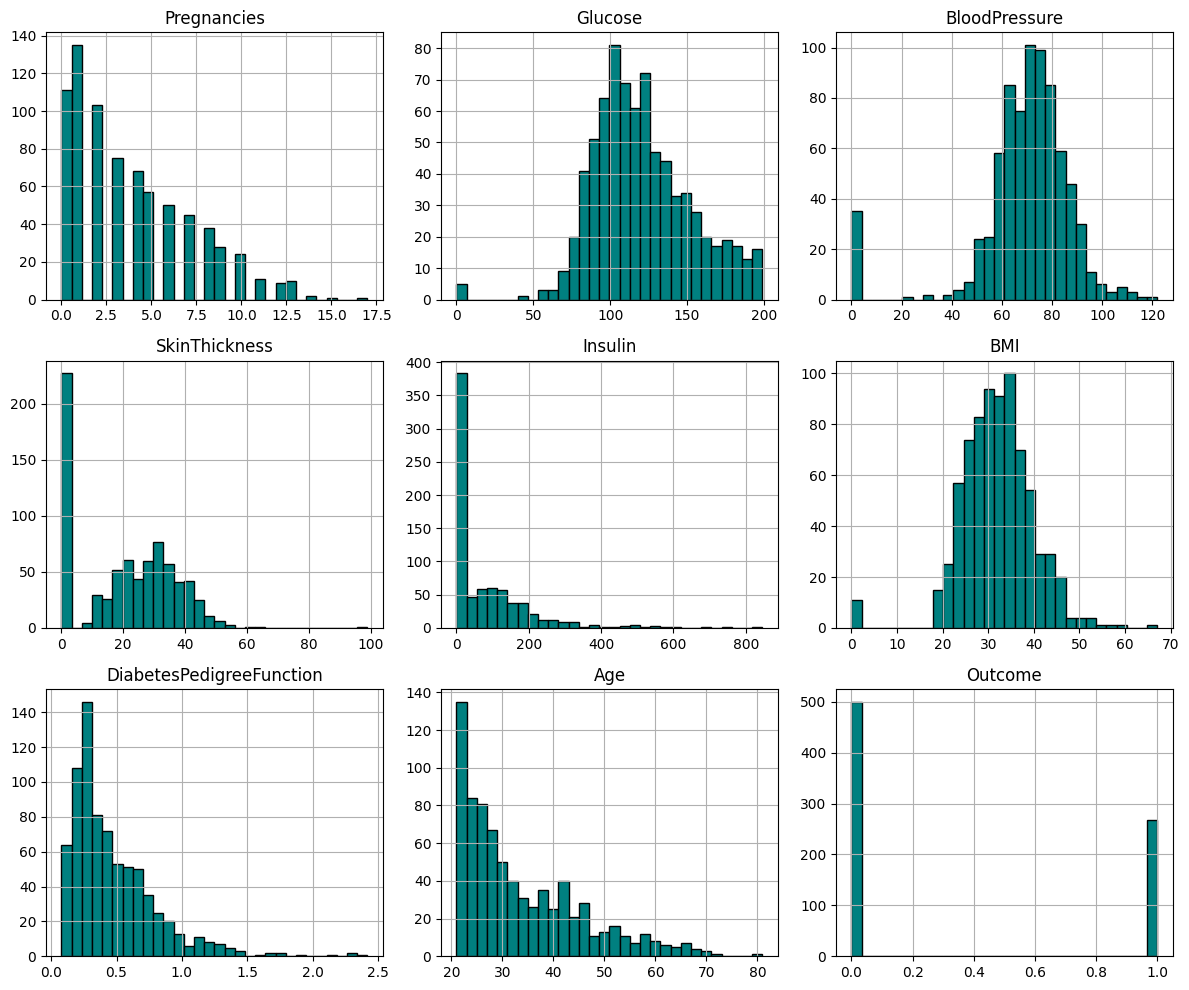

In [ ]:
# Plot the distribution of each feature
plt.figure(figsize=(12, 10))
df.hist(bins=30, figsize=(12, 10), color='teal', edgecolor='black')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Update with your file path


In [ ]:
# Features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


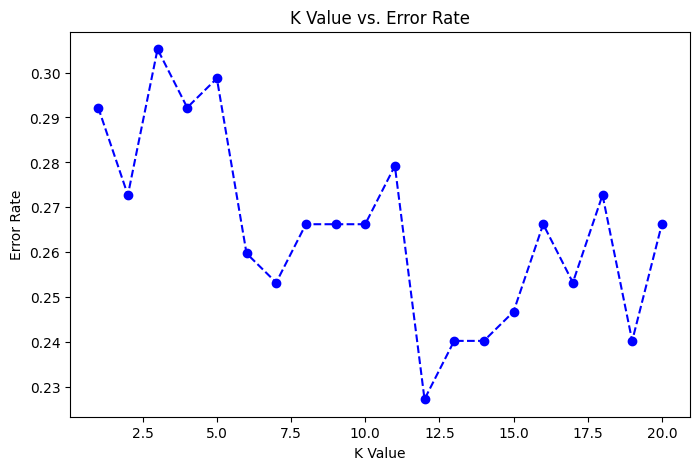

In [ ]:
# Try different values of K and find the optimal one
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Using Euclidean distance
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

# Plot Error Rate vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='blue')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('K Value vs. Error Rate')
plt.show()


In [ ]:
optimal_k = k_values[np.argmin(error_rates)]  # Get K with the lowest error
print(f"Optimal K: {optimal_k}")

# Train the final KNN model with the best K
knn_best = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_best.fit(X_train, y_train)

# Evaluate Accuracy
y_pred_best = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Final Model Accuracy: {accuracy:.4f}")


Optimal K: 12
Final Model Accuracy: 0.7727


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns

# Predict on test set using the best K value
y_pred_best = knn_best.predict(X_test)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.7727
Precision: 0.7209
Recall: 0.5741


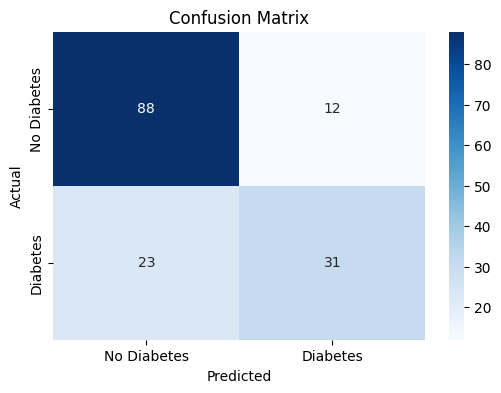

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Evaluate performance for different K values
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"K={k}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")


K=1: Accuracy=0.7078, Precision=0.5882, Recall=0.5556
K=2: Accuracy=0.7273, Precision=0.7000, Recall=0.3889
K=3: Accuracy=0.6948, Precision=0.5686, Recall=0.5370
K=4: Accuracy=0.7078, Precision=0.6552, Recall=0.3519
K=5: Accuracy=0.7013, Precision=0.5833, Recall=0.5185
K=6: Accuracy=0.7403, Precision=0.6842, Recall=0.4815
K=7: Accuracy=0.7468, Precision=0.6596, Recall=0.5741
K=8: Accuracy=0.7338, Precision=0.6667, Recall=0.4815
K=9: Accuracy=0.7338, Precision=0.6383, Recall=0.5556
K=10: Accuracy=0.7338, Precision=0.6585, Recall=0.5000
K=11: Accuracy=0.7208, Precision=0.6078, Recall=0.5741
K=12: Accuracy=0.7727, Precision=0.7209, Recall=0.5741
K=13: Accuracy=0.7597, Precision=0.6809, Recall=0.5926
K=14: Accuracy=0.7597, Precision=0.7073, Recall=0.5370
K=15: Accuracy=0.7532, Precision=0.6667, Recall=0.5926
K=16: Accuracy=0.7338, Precision=0.6757, Recall=0.4630
K=17: Accuracy=0.7468, Precision=0.6829, Recall=0.5185
K=18: Accuracy=0.7273, Precision=0.6667, Recall=0.4444
K=19: Accuracy=0.75